In [282]:
import cv2
import math
import random
import time
import numpy as np
import matplotlib.pyplot as plt

### Galilean Transformation
Galilean transformation is defined as: 

r′ = r + vt  
t′ = t   

where r is the position of the particle in an inertial frame (x, y), r′is the transformed position in a new inertial frame
(x′, y′), v is a constant in which |v| ≪ c is the linear velocity vector of the new frame, and finally t and t′ are the invariant time variables. The Galilean transformation keeps some physical quantities invariant. Among them, is the distance     

$\Delta$r = r<sub>2</sub> −r<sub>1</sub>,     

that remains invariant under the transformation in the new frame,

$\Delta$r′ = r′<sub>2</sub> − r′<sub>1</sub> = $\Delta$r = r<sub>2</sub> − r<sub>1</sub>.

In [283]:
def get_galilean_transformation(r, v, t):
    time.sleep(0.3)
    return r + v * t

In [284]:
x = [each for each in range(50)]
y = [get_galilean_transformation(each, 4, time.time()) for each in range(50)]

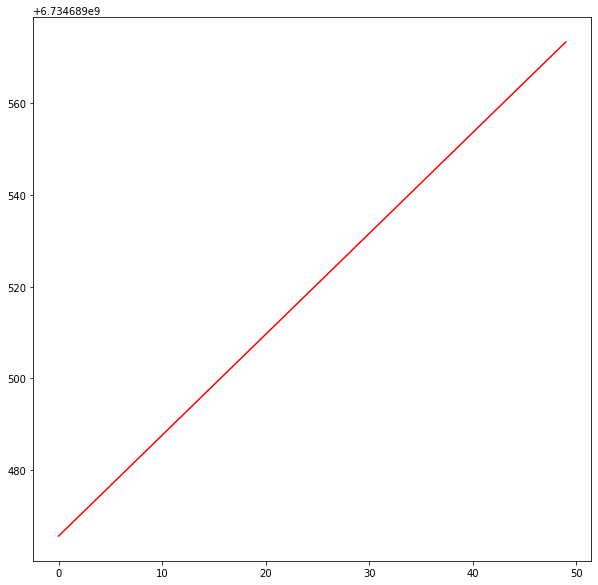

In [285]:
plt.figure(figsize = (10,10))
plt.plot(x, y, color="red")

### Rotational Transformation
Rotational transformation is defined as

$$r′ = Rr =\left[\begin{array}{cc} cos θ & −sin θ \\
sin θ  & cos θ\end{array}\right]r$$
t′ = t
where θ is a constant rotation angle around the z–axis, for theframe r = (x, y) to rotate into the frame r′ = (x′, y′).
Rotational symmetry transformation also keeps the distance 1r invariant in the new frame. It keeps the position distribution of points unchanged as well.

In [286]:
def get_rotational_transformation(x, y, theta):
    return x * math.cos(theta) - y * math.sin(theta), x * math.sin(theta) + y * math.cos(theta)

In [287]:
points = [get_rotational_transformation(each, each, 2.67) for each in range(50)]
x0, y0 = zip(*points)

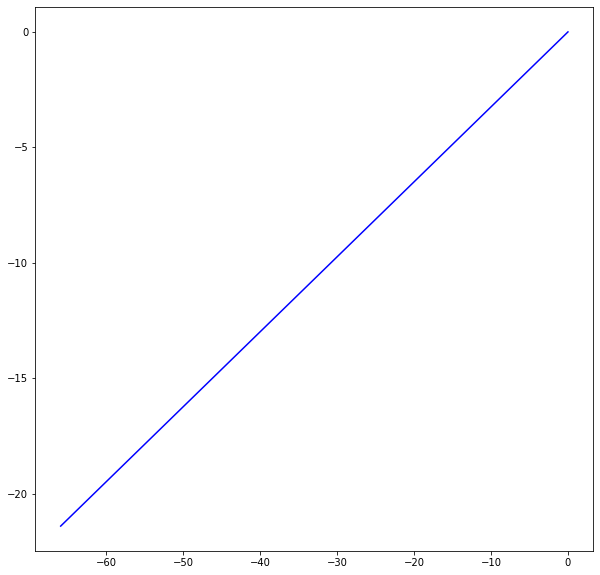

In [288]:
plt.figure(figsize = (10,10))
plt.plot(x0, y0, color="blue")

### KAA Map
Therefore, the combined symmetry transformation, which is    
r′ = Rr + vt   
t′ = t     
keeps the distance $\Delta$r invariant in the new frame and the distribution of the positions of particles (in this case, pixels) is maintained. In the KAA map model, we introduce the transformation:  
r′ = R(θ(t))r + v(t),   
where the rotation angle θ is made time (step) dependant θ(t) and the linear velocity v is no longer constant but made time (step) dependant v(t), as well. The θ and v are polynomial functions that depend on the parameter t. This transformation destroys completely any symmetry of the group of positions r in the initial frame after being transformed into the new frame.
We introduce the KAA map finally as  
$$\left[\begin{array}{cc} y′ \\ x′\end{array}\right] = (\left[\begin{array}{cc} cos θ & −sin θ \\
sin θ  & cos θ\end{array}\right]\left[\begin{array}{cc} y \\ x\end{array}\right] + \left[\begin{array}{cc} V1 \\ V 2\end{array}\right]* t )~mod~N $$
where mod N is used to confine the numbers from 0 to 255 which is the minimum and maximum value a pixel can attain.

In [289]:
def get_combined_transformation(x, y, theta, v1, v2):
    x1 = x * math.cos(theta) - y * math.sin(theta) + v1 * time.time()
    time.sleep(0.1)
    y1 = x * math.sin(theta) + y * math.cos(theta) + v2 * time.time()
    return x1 % 255, y1 % 255

In [290]:
points = [get_combined_transformation(each, each, 1.56, 4, 7) for each in range(50)]
xt, yt = zip(*points)

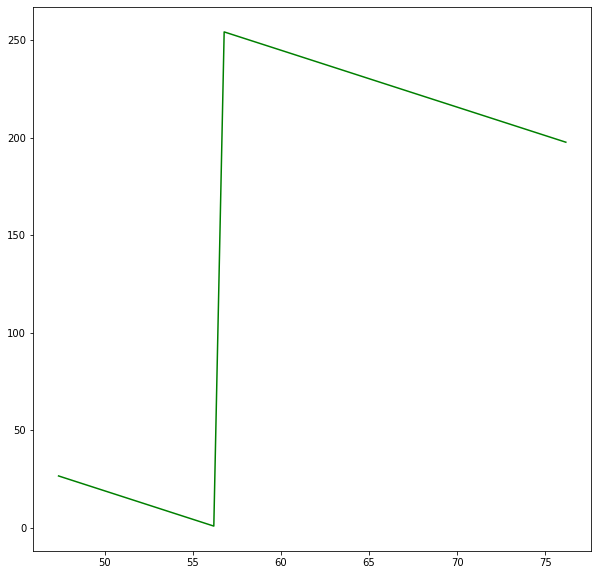

In [291]:
plt.figure(figsize = (10,10))
plt.plot(xt, yt, color="green")

### Logistic Map
The Logistic map is a discrete-time analog of the logistic equation for population growing [27]. Mathematically, the Logistic map is defined as,

x<sub>i+1</sub> = 4px<sub>i</sub>(1 − x<sub>i</sub>)     

where parameter p is within the range of [0, 1]. When p ∈ [0.89, 1], Logistic map is chaotic.
Bifurcation diagram shows the output distribution of a chaotic map along its control parameter, while iteration function
describes the output distributions along its inputs. It is noticed that the outputs of Logistic map distribute in a larger area when p
approaches to 1.

In [292]:
def get_logistic_map(current, p, limit):
    def next_element(x, p):
        return 4 * p * x * (1 - x)
    result = []
    for i in range(limit):
        result.append(current)
        current = next_element(current, p)
    return result

In [293]:
def get_logistic_map_plot_arrays(current, p, limit):
    return np.array([each for each in range(limit)]), np.array(get_logistic_map(current, p, limit))

In [294]:
x1, y1 = get_logistic_map_plot_arrays(0.3, 0.89, 20)
x2, y2 = get_logistic_map_plot_arrays(0.3, 0.99, 20)

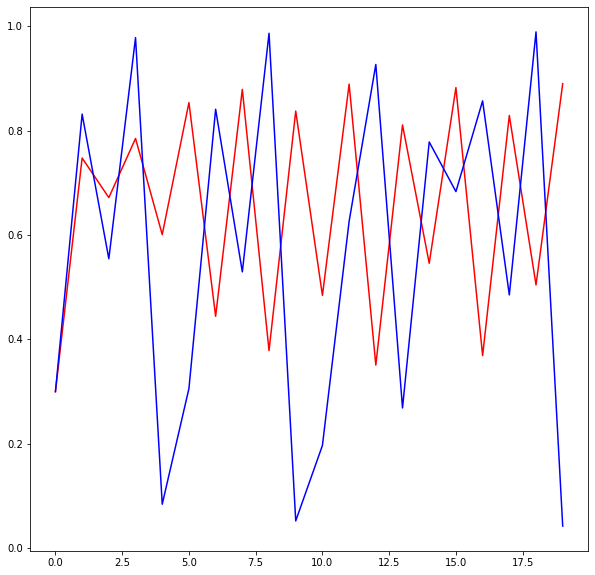

In [295]:
plt.figure(figsize = (10,10))
plt.plot(x1, y1, color="red")
plt.plot(x2, y2, color="blue")

### Sine Map
When sine function has inputs within the range of [0, π], its outputs fall into the range of [0, 1]. Sine map is derived
from sine function by transforming its inputs into [0, 1]. It is defined as

x<sub>i+1</sub> = s sin(πx<sub>i</sub>)

where parameter s ∈ [0, 1]. Sine map is chaotic when s ∈ [0.87, 1].
Although Logistic and Sine maps have totally different mathematical definitions, their chaotic behaviors are quite similar.

In [296]:
def get_sine_map(current, s, limit):
    def next_element(x, s):
        return s * math.sin(math.pi * x)
    result = []
    for i in range(limit):
        result.append(current)
        current = next_element(current, s)
    return result

In [297]:
def get_sine_map_plot_arrays(current, s, limit):
    return np.array([each for each in range(limit)]), np.array(get_sine_map(current, s, limit))

In [298]:
x3, y3 = get_sine_map_plot_arrays(0.3, 0.87, 50)
x4, y4 = get_sine_map_plot_arrays(0.3, 0.99, 50)

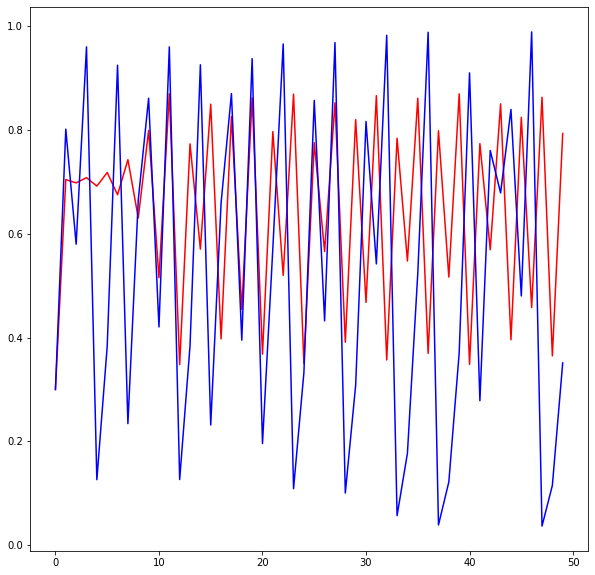

In [299]:
plt.figure(figsize = (10,10))
plt.plot(x3, y3, color="red")
plt.plot(x4, y4, color="blue")

### 2D Logistic-adjusted-Sine map
We give the mathematical definition of 2D-LASM,

x<sub>i+1</sub> = sin(πμ(y<sub>i</sub> + 3)x<sub>i</sub>(1 − x<sub>i</sub>))   
y<sub>i+1</sub> = sin(πμ(x<sub>i+1</sub> + 3)y<sub>i</sub>(1 − y<sub>i</sub>))

where parameter μ ∈ [0, 1]. 2D-LASM is derived from Sine and Logistic maps. The logistic equation x<sub>i</sub>(1 − x<sub>i</sub>) is first scaled by a factor of μ, and fed into the input of Sine map. The phase plane is then extended from 1D to 2D. In 2D-LASM, two inputs are interactively influenced and the output pairs (x<sub>i+1</sub>, y<sub>i+1</sub>) distribute into the 2D phase plane. 

Compared with Sine and Logistic maps, it has a more complicated structure and its outputs are more difficult to be predicted.

In [300]:
def get_2D_logistic_adjusted_sine_map(x, y, u, limit):
    def get_next_x(x, y, u):
        return math.sin(math.pi * u * (y + 3) * x * (1 - x))
    def get_next_y(x, y, u):
        return math.sin(math.pi * u * (x + 3) * y * (1 - x))
    result_x = []
    result_y = []
    for i in range(limit):
        result_x.append(x)
        result_y.append(y)
        x = get_next_x(x, y, u)
        y = get_next_y(x, y, u)
    return result_x, result_y

In [430]:
x5, y5 = get_2D_logistic_adjusted_sine_map(0.3, 0.3, 0.9, 50)

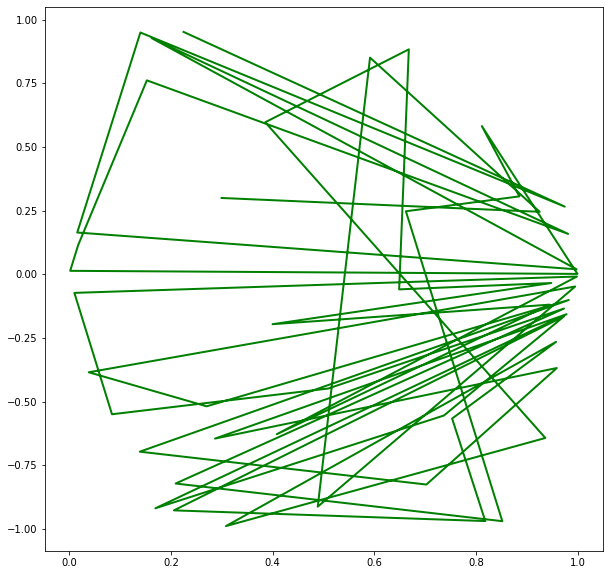

In [431]:
plt.figure(figsize = (10,10))
plt.plot(x5, y5, color="green", linewidth=2.0)

### THE LINEAR CONGRUENTIAL GENERATOR
The linear congruential generator (LCG) was first published in 1960 by Thomson and Rotenberg. It is one of the best PRNGs that provide fast software and hardware implementations. This is because a LCG requires minimal memory to retain state. Evidence of the LCG’s statistical superiority as a PRNG is that a 96-bit LCG is compliant with (i.e. passes) the most rigorous BigCrush suite. Here, it is used to generate a sequence of integers from 1 to (m − 1), and is mathematically defined as,      
X<sub>n</sub> = (aX<sub>n - 1</sub> − 1 + c) mod m    
where a is a control parameter.

In [303]:
def linear_congruential_generator(x, a, c, limit):
    def get_next_element(x, a, c, limit):
        return (a * x - 1 + c) % limit
    result = []
    for i in range(limit):
        result.append(x)
        x = get_next_element(x, a, c, limit)
    return result

In [304]:
x6 = [each for each in range(255)]
y6 = linear_congruential_generator(0, 96, 2, 255)

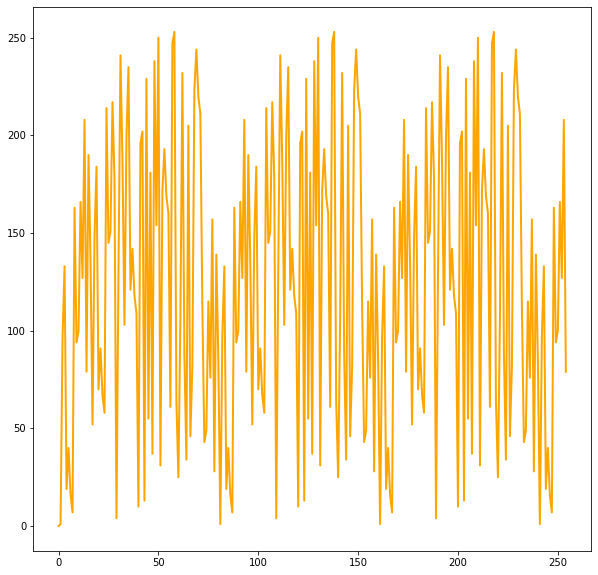

In [305]:
plt.figure(figsize = (10,10))
plt.plot(x6, y6, color="orange", linewidth=2.0)

### THE BERNOULLI MAP
The Bernoulli chaotic map is a one dimensional chaotic map that is defined from the range −A to A. It is one example of strongly chaotic functions that display exponential decay of correlation to their equilibrium values. Not only is it easy to compute, but also provides much desired properties of chaotic behavior needed for image encryption. The Lyapunov exponent of the Bernoulli map is log<sub>2</sub>. Being an exact system (i.e. mixing and ergodic), after only a small number of iterations, the Bernoulli map when applied with 2 different sets of initial conditions, results in very different trajectories.
It is mathematically defined as     
x<sub>(n + 1)</sub> =   
(Bx<sub>(n)</sub>) − A, −A <= x <= 0,    
(Bx<sub>(n)</sub>) + A, 0 <= x <= A,    
where the sequence is generated with the following parameters: A = 0.5, B = 1.75 and x(1) = (B×0.25)−A. Therefore, the range of the generated chaotic system is from −1/2 to 1/2

In [306]:
def get_bernoulli_map(x, a, b, limit):
    def get_next_element(x, a, b):
        if -a <= x <= 0:
            return (b * x) - a
        elif 0 <= x <= a:
            return (b * x) + a
        return 0
    result = []
    for i in range(limit):
        result.append(x)
        x = get_next_element(x, a, b)
    return result

In [307]:
x7 = [each for each in range(50)]
y7 = get_bernoulli_map((0.25 * 1.75) - 0.5, 0.5, 1.75, 50)

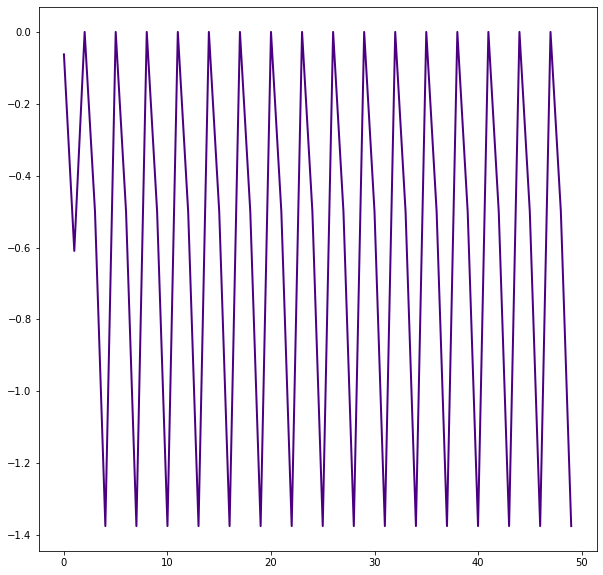

In [308]:
plt.figure(figsize = (10,10))
plt.plot(x7, y7, color="indigo", linewidth=2.0)

### THE TENT MAP
The Tent map is also a chaotic one dimensional map that displays a good chaotic sequential behaviour. Similar to the
Bernoulli map, it has a Lyapunov exponent of log<sub>2</sub>, but unlike the Bernoulli map, the x−correlation function for the
Tent map is δ−correlated. It is mathematically expressed as    
x<sub>(n + 1)</sub> =    
C(x<sub>(n)</sub>), 0 < x < 1/2    
C(1 − x(<sub>n</sub>)), 1/2 < x < 1    
where the sequence is generated with the parameters
C = 1.5 and x(1) = 0.5.

In [309]:
def get_tent_map(x, c, limit):
    def get_next_element(x, c):
        if 0 <= x <= 0.5:
            return c * x
        if 0.5 <= x <= 1:
            return c * (1 - x)
        return x
    result = []
    for i in range(limit):
        result.append(x)
        x = get_next_element(x, c)
    return result

In [310]:
x8 = [each for each in range(50)]
y8 = get_tent_map(0.5, 1.5, 50)

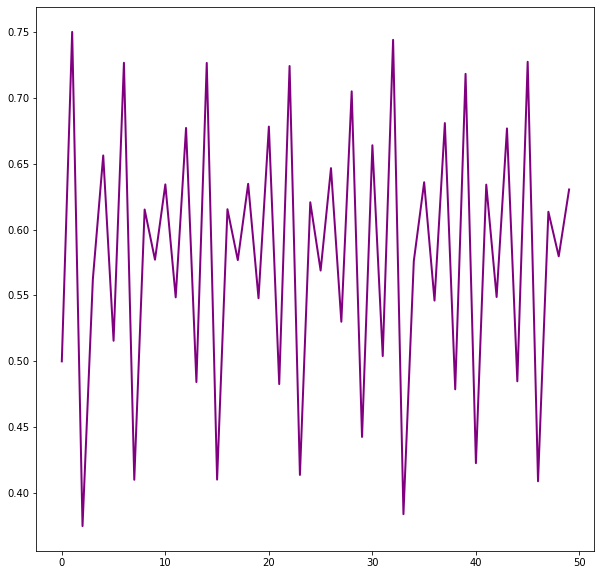

In [311]:
plt.figure(figsize = (10,10))
plt.plot(x8, y8, color="purple", linewidth=2.0)

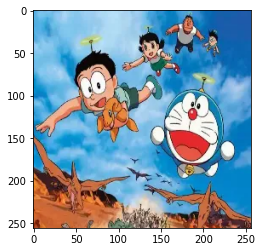

In [416]:
image_path = './pictures/doraemon.webp'
image = cv2.imread(image_path)
h = np.array(image)
blue, green, red = cv2.split(h)
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)
x, y, z = np.shape(image)

In [417]:
def get_combined_transformation(x, y, theta, v1, v2, l, b, t):
    x1 = x * math.cos(theta) - y * math.sin(theta) + v1 * t
    y1 = x * math.sin(theta) + y * math.cos(theta) + v2 * t
    return int(x1) % l, int(y1) % b

In [418]:
theta = random.randint(-180, 180)
v1 = random.randint(1, 100)
v2 = random.randint(1, 100)
t = time.time()
freq = random.randint(10, 20)

In [419]:
for k in range(freq):
    for i in range(x):
        for j in range(y):
            new_x, new_y = get_combined_transformation(i, j, theta, v1, v2, x, y, t)
            red[i][j] = red[new_x][new_y] ^ red[i][j]
            blue[i][j] = blue[new_x][new_y] ^ blue[i][j]
            green[i][j] = green[new_x][new_y] ^ green[i][j]

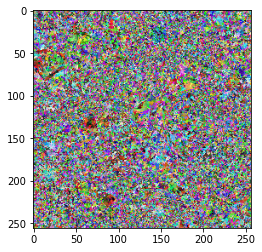

In [420]:
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)

In [421]:
for k in range(freq):
    for i in range(x - 1, -1, -1):
        for j in range(y - 1, -1, -1):
            new_x, new_y = get_combined_transformation(i, j, theta, v1, v2, x, y, t)
            red[i][j] = red[new_x][new_y] ^ red[i][j]
            blue[i][j] = blue[new_x][new_y] ^ blue[i][j]
            green[i][j] = green[new_x][new_y] ^ green[i][j]

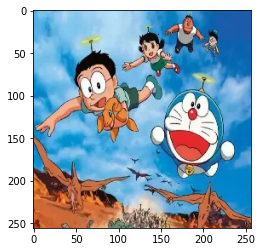

In [422]:
rgb_img = cv2.merge([red, green, blue])
plt.imshow(rgb_img)

In [424]:
def get_2D_logistic_adjusted_sine_map(x, y, u, limit):
    def get_next_x(x, y, u):
        return math.sin(math.pi * u * (y + 3) * x * (1 - x))
    def get_next_y(x, y, u):
        return math.sin(math.pi * u * (x + 3) * y * (1 - x))
    result_x = []
    result_y = []
    for i in range(limit):
        result_x.append(x)
        result_y.append(y)
        x = get_next_x(x, y, u)
        y = get_next_y(x, y, u)
    return result_x, result_y

In [432]:
x_ = random.uniform(1, 100)
y_ = random.uniform(1, 100)
u_ = random.uniform(1, 100)
limit = 256

In [433]:
result_x, result_y = get_2D_logistic_adjusted_sine_map(x_, y_, u_, limit)